In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('netflix.csv')

In [3]:
print(df.head())

               title            genre language  imdb_score    premiere  \
0   Notes for My Son            Drama  Spanish         6.3  11/24/2020   
1   To Each, Her Own  Romantic comedy   French         5.3   6/24/2018   
2      The Lovebirds  Romantic comedy  English         6.1   5/22/2020   
3     The Perfection  Horror-thriller  English         6.1   5/24/2019   
4  Happy Anniversary  Romantic comedy  English         5.8   3/30/2018   

   runtime  year  
0       83  2020  
1       95  2018  
2       87  2020  
3       90  2019  
4       78  2018  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       583 non-null    object 
 1   genre       583 non-null    object 
 2   language    583 non-null    object 
 3   imdb_score  583 non-null    float64
 4   premiere    583 non-null    object 
 5   runtime     583 non-null    int64  
 6   year        583 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 32.0+ KB
None


In [5]:
# Check for missing values
print(df.isnull().sum())

title         0
genre         0
language      0
imdb_score    0
premiere      0
runtime       0
year          0
dtype: int64


In [6]:
df = df.dropna(subset=['title', 'genre', 'language', 'imdb_score', 'premiere', 'runtime', 'year'])

In [7]:
# Convert 'year' and 'imdb_score' to appropriate types if necessary
df['year'] = df['year'].astype(int)
df['imdb_score'] = pd.to_numeric(df['imdb_score'], errors='coerce')
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')

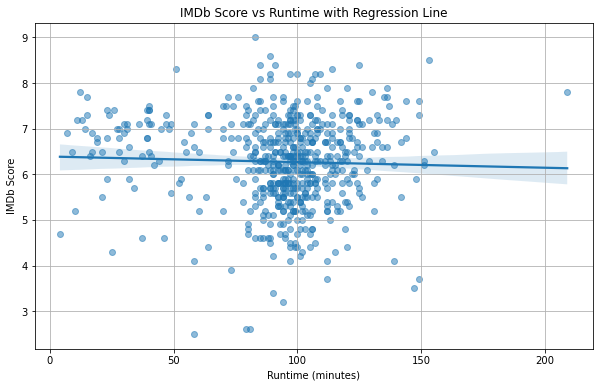

In [8]:
#IMDB score vs Runtime 
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.regplot(x='runtime', y='imdb_score', data=df, scatter_kws={'alpha':0.5})
plt.title('IMDb Score vs Runtime with Regression Line')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Score')
plt.grid(True)
plt.show()

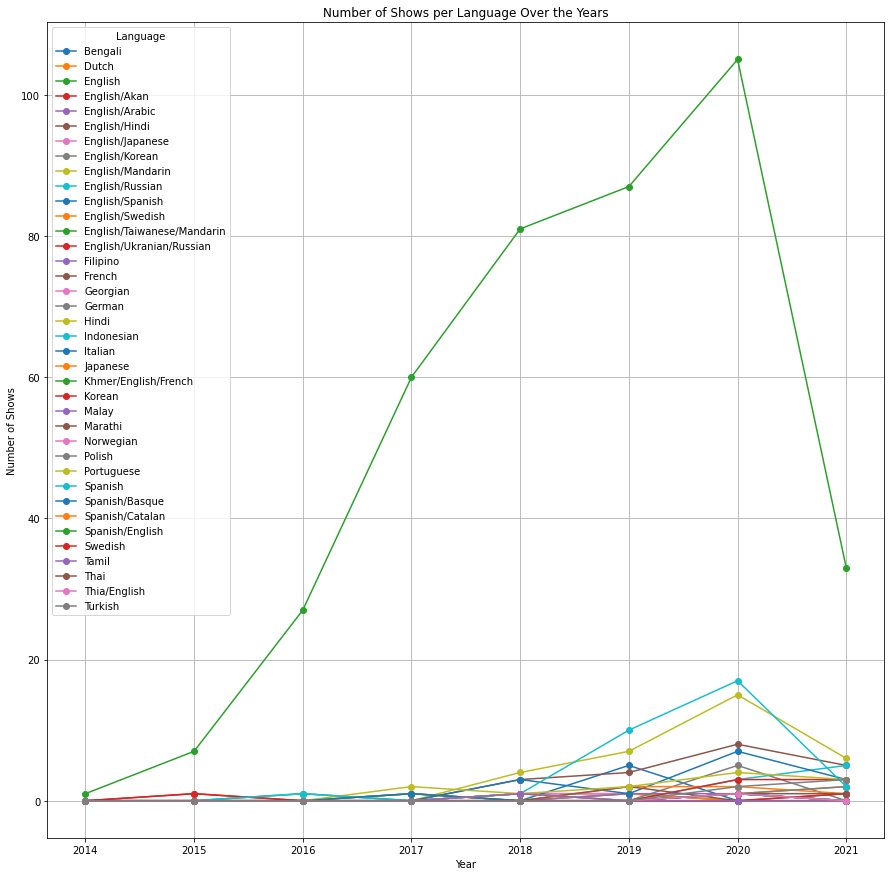

In [9]:
# Count the number of shows per language each year
language_per_year = df.groupby(['year', 'language']).size().unstack().fillna(0)

# Plot the results
language_per_year.plot(kind='line', marker='o', figsize=(15,15), legend =False)
plt.title('Number of Shows per Language Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.legend(title='Language')
plt.grid(True)
plt.show()

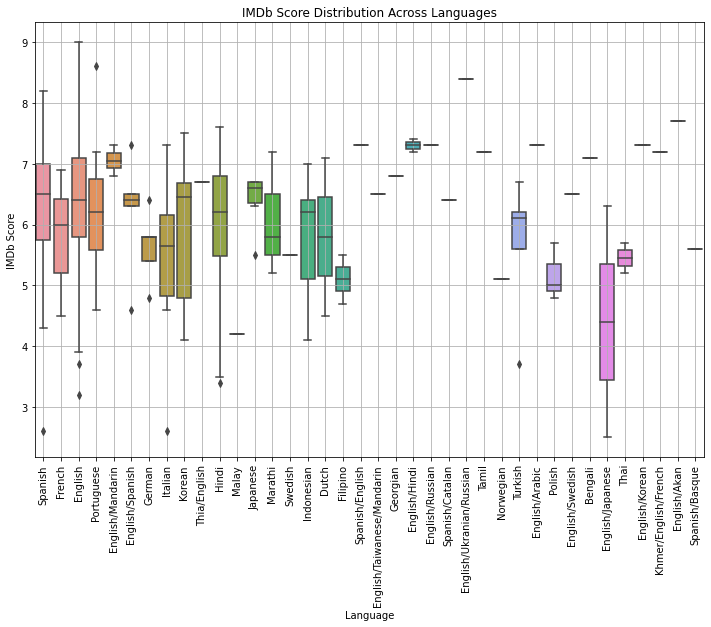

In [10]:
# Plot the distribution of IMDb scores for each language
plt.figure(figsize=(12, 8))
sns.boxplot(x='language', y='imdb_score', data=df)
plt.title('IMDb Score Distribution Across Languages')
plt.xlabel('Language')
plt.ylabel('IMDb Score')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

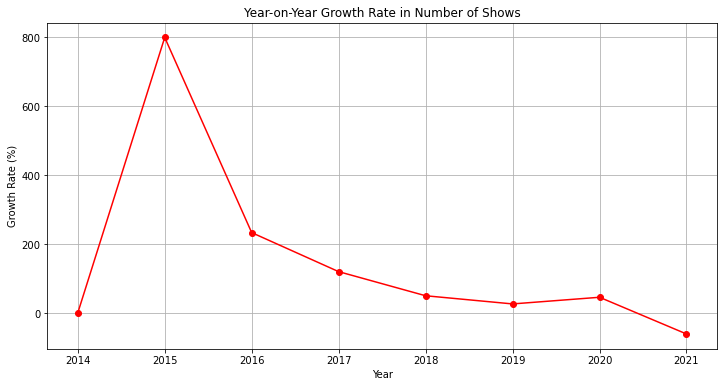

In [11]:
# Count the number of shows released each year
shows_per_year = df.groupby('year').size()

# Calculate the year-on-year growth rate
growth_rate = shows_per_year.pct_change().fillna(0) * 100
plt.figure(figsize=(12, 6))
plt.plot(growth_rate.index, growth_rate.values, marker='o', color='r')
plt.title('Year-on-Year Growth Rate in Number of Shows')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.show()

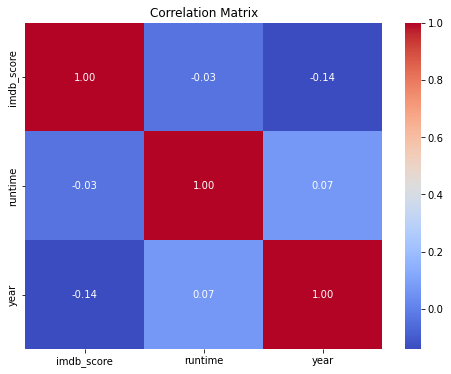

In [12]:
# Calculate correlations
correlation_matrix = df[['imdb_score', 'runtime', 'year']].corr()

# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

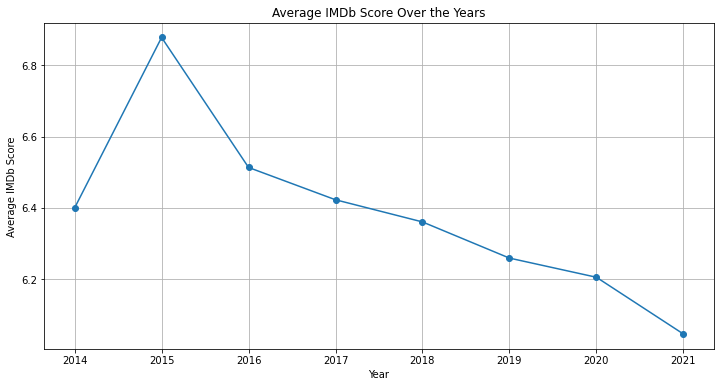

In [13]:
# Calculate average IMDb score per year
average_imdb_score_per_year = df.groupby('year')['imdb_score'].mean()

# Plot the average IMDb score per year
plt.figure(figsize=(12, 6))
plt.plot(average_imdb_score_per_year.index, average_imdb_score_per_year.values, marker='o')
plt.title('Average IMDb Score Over the Years')
plt.xlabel('Year')
plt.ylabel('Average IMDb Score')
plt.grid(True)
plt.show()

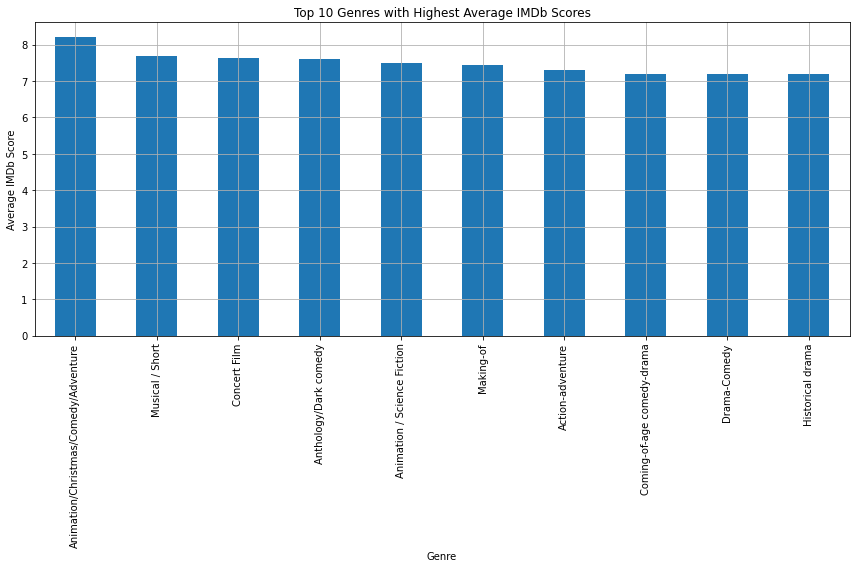

In [14]:
# Load the dataset
df = pd.read_csv('netflix.csv')

# Clean the Data
# Replace NaN or non-string values in 'genre' with an empty string
df['genre'] = df['genre'].apply(lambda x: x if isinstance(x, str) else '')

# Ensure genre column is split into lists correctly
df['genre'] = df['genre'].str.split(',').apply(lambda x: [genre.strip() for genre in x if genre])

# Explode the DataFrame to handle multiple genres
df_exploded = df.explode('genre')

# Calculate average IMDb score by genre
average_imdb_score_by_genre = df_exploded.groupby('genre')['imdb_score'].mean()

# Identify the top 10 genres with highest average IMDb scores
top_genres = average_imdb_score_by_genre.nlargest(10)

# Plot the top 10 genres with highest average IMDb scores
plt.figure(figsize=(12, 8))
top_genres.plot(kind='bar')
plt.title('Top 10 Genres with Highest Average IMDb Scores')
plt.xlabel('Genre')
plt.ylabel('Average IMDb Score')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.savefig('top_10_genres_imdb_scores.png')
plt.show()


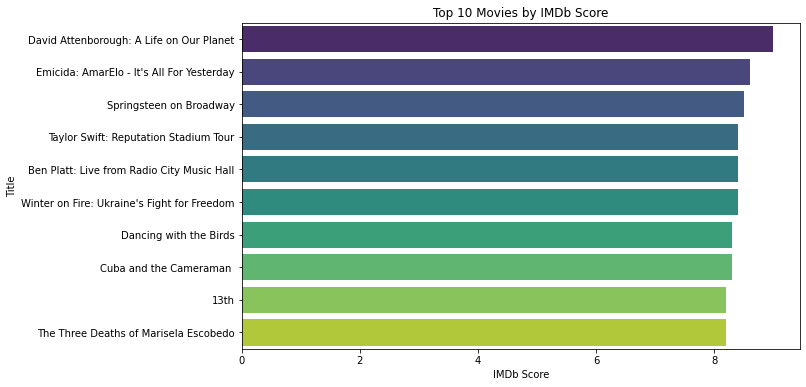

In [15]:
#Top 10 Movies by IMDb Score
# Assuming df is your DataFrame
top_10_movies = df[['title', 'imdb_score']].sort_values(by='imdb_score', ascending=False).head(10)
df1 = pd.DataFrame(top_10_movies)

top_10_movies = df1.sort_values(by='imdb_score', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='imdb_score', y='title', data=top_10_movies, palette='viridis')
plt.title('Top 10 Movies by IMDb Score')
plt.xlabel('IMDb Score')
plt.ylabel('Title')
plt.show()


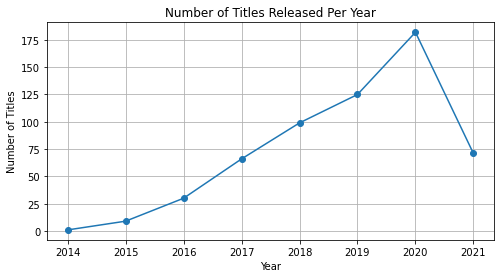

In [16]:
# Counting the number of titles per year
titles_per_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
titles_per_year.plot(kind='line', marker='o')
plt.title('Number of Titles Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


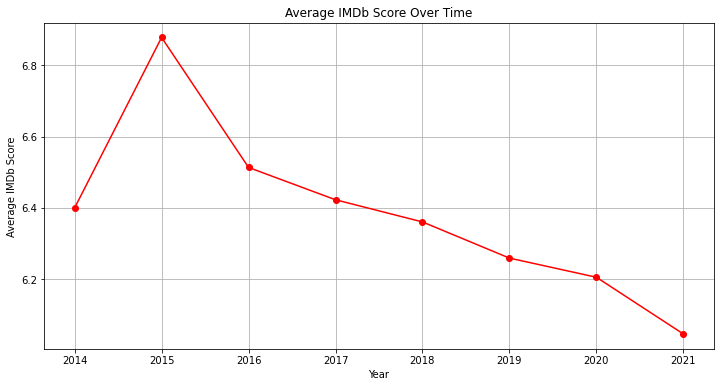

In [17]:
# Grouping by year and calculating average IMDb score
average_imdb_per_year = df.groupby('year')['imdb_score'].mean()

plt.figure(figsize=(12, 6))
average_imdb_per_year.plot(kind='line', marker='o', color='r')
plt.title('Average IMDb Score Over Time')
plt.xlabel('Year')
plt.ylabel('Average IMDb Score')
plt.grid(True)
plt.show()


<Figure size 1008x576 with 0 Axes>

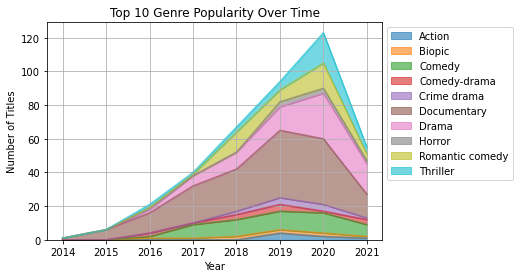

In [40]:
# Creating a pivot table for genres by year only for top 10 genre 
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('netflix.csv')

# Step 1: Calculate the total number of titles for each genre
genre_counts = df['genre'].value_counts()

# Step 2: Get the top 10 genres
top_genres = genre_counts.head(10).index

# Step 3: Filter the dataset to include only the top 10 genres
filtered_df = df[df['genre'].isin(top_genres)]

# Create a pivot table for the top 10 genres by year
genre_by_year = filtered_df.pivot_table(index='year', columns='genre', aggfunc='size', fill_value=0)

# Step 4: Plot the stacked area chart
plt.figure(figsize=(14, 8))
genre_by_year.plot(kind='area', stacked=True, alpha=0.6)
plt.title('Top 10 Genre Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


In [42]:
# Count the number of titles per year
titles_per_year = df['year'].value_counts().sort_index()

# Find the year with the highest number of titles
max_titles_year = titles_per_year.idxmax()
max_titles_count = titles_per_year.max()

print(f'Year with the highest number of titles: {max_titles_year} ({max_titles_count} titles)')


Year with the highest number of titles: 2020 (182 titles)


In [44]:
# Calculate the correlation between runtime and IMDb score
correlation_runtime_imdb = df[['runtime', 'imdb_score']].corr().loc['runtime', 'imdb_score']

print(f'Correlation between Runtime and IMDb Score: {correlation_runtime_imdb:.2f}')


Correlation between Runtime and IMDb Score: -0.03


In [46]:
# Create a pivot table for genres by year
genre_by_year = df.pivot_table(index='year', columns='genre', aggfunc='size', fill_value=0)

# Calculate the difference in the number of titles from the earliest year to the latest year for each genre
initial_year = genre_by_year.index.min()
final_year = genre_by_year.index.max()

increase_per_genre = genre_by_year.loc[final_year] - genre_by_year.loc[initial_year]
largest_increase_genre = increase_per_genre.idxmax()
largest_increase_amount = increase_per_genre.max()

print(f'Genre with the largest increase in number of titles: {largest_increase_genre} ({largest_increase_amount} increase)')

Genre with the largest increase in number of titles: Drama (18 increase)


In [52]:
# Calculate the total runtime for each genre
total_runtime_by_genre = df.groupby('genre')['runtime'].sum().sort_values(ascending=False).head(10)
print(total_runtime_by_genre)

genre
Documentary        12555
Drama               8263
Comedy              4687
Romantic comedy     3927
Thriller            3469
Comedy-drama        1472
Crime drama         1300
Biopic               968
Horror               894
Action               756
Name: runtime, dtype: int64
